# Sales Analysis

#### Import necessary libraries

In [463]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [464]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [465]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [466]:
ll = all_data
ll

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
168462,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
168463,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
168464,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
168465,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [467]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
168462,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
168463,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
168464,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
168465,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [468]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


##### Get rid of text in order date column

In [469]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [470]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [471]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


#### Add month column (alternative method)

#### Add city column

In [472]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
lldf = all_data
lldf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,New York City (NY)
...,...,...,...,...,...,...,...,...
168462,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
168463,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
168464,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
168465,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [473]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [474]:
all_data = all_data.groupby(['Month']).sum()
all_data

C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\3415857661.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data = all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,19,5167.43,5170.42
5,18638,3124569.68,3142047.46
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [475]:
all_data.iloc[3]=(all_data.iloc[2]+all_data.iloc[4])/2
all_data

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.380,1822256.73
2,13449.0,2188884.720,2202022.42
3,17005.0,2791207.830,2807100.38
4,17821.5,2957888.755,2974573.92
5,18638.0,3124569.680,3142047.46
6,15253.0,2562025.610,2577802.26
7,16072.0,2632539.560,2647775.76
8,13448.0,2230345.420,2244467.88
9,13109.0,2084992.090,2097560.13


range(1, 13)


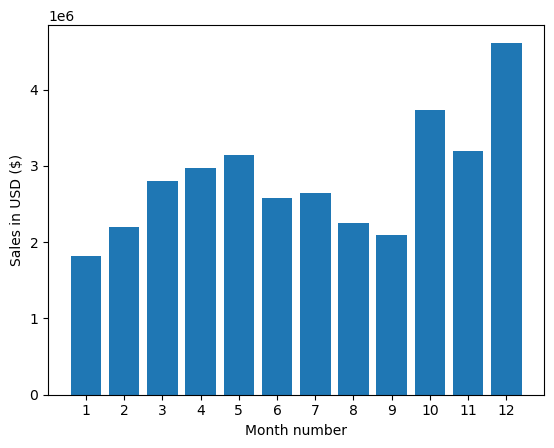

In [482]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.savefig('product_sale_in_12th.png')
plt.show()



In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor

In [478]:
# Wczytanie danych historycznych
newdf = {'Months': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
        'Sales in USD ($)': [1822256.73, 2188884.72 ,2807100.38, 2974573.92, 3142047.46, 2577802.26,
                   2647775.76, 2244467.88, 2097560.13, 3736726.88, 3199603.20, 4613443.34]}
df = pd.DataFrame(newdf)

# Dopasowanie modelu Random Forest
model = RandomForestRegressor()
model.fit(df[['Months']], df['Sales in USD ($)'])

# Predykcja przyszłych wartości
future_Months = [13]
Sales_thirteen_months = model.predict(pd.DataFrame(future_Months, columns=['Months']))
ij = print(future_Months, '=',  Sales_thirteen_months)
ij

[13] = [4181078.82359999]


In [479]:
df.loc[len(df)] = [13,Sales_thirteen_months[0]]
df.index +=1
df

,Months,Sales in USD ($)
1,1.0,1.822257e+06
2,2.0,2.188885e+06
3,3.0,2.807100e+06
4,4.0,2.974574e+06
5,5.0,3.142047e+06
6,6.0,2.577802e+06
7,7.0,2.647776e+06
8,8.0,2.244468e+06
9,9.0,2.097560e+06
10,10.0,3.736727e+06


range(1, 14)


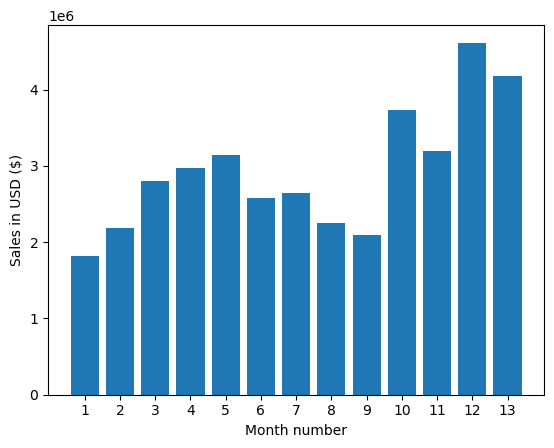

In [481]:
months = range(1,14)
print(months)

plt.bar(months,df.groupby(['Months']).sum()['Sales in USD ($)'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.savefig('product_sale_in_13th.png')
plt.show()

In [452]:
all_data.corr()

,Quantity Ordered,Price Each,Sales
Quantity Ordered,1.000000,0.998515,0.998521
Price Each,0.998515,1.000000,1.000000
Sales,0.998521,1.000000,1.000000


#### Question 2: What time should we display advertisements to maximize likelihood of customer's buying product?

In [453]:
# Add hour column
lldf['Hour'] = pd.to_datetime(lldf['Order Date']).dt.hour
lldf['Minute'] = pd.to_datetime(lldf['Order Date']).dt.minute
lldf['Count'] = 1
lldf


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,Seattle (WA),23.98,22,21,1
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,Dallas (TX),99.99,15,11,1
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,Portland (OR),700.00,14,40,1
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,Los Angeles (CA),7.68,20,59,1
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,New York City (NY),7.68,19,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...
168462,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97,20,56,1
168463,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00,16,0,1
168464,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00,7,39,1
168465,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99,17,30,1


C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\1050169873.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in lldf.groupby(['Hour'])]


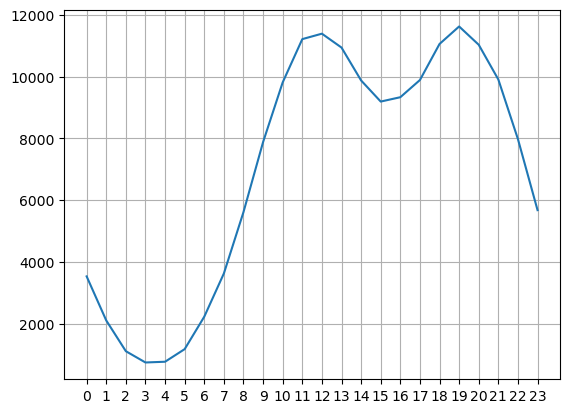

In [461]:
keys = [pair for pair, df in lldf.groupby(['Hour'])]

plt.plot(keys, lldf.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.savefig('product_sale_by_hour.png')
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 3: What products are most often sold together?

In [455]:

df = lldf[lldf['Order ID'].duplicated(keep=False)]


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\7383458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [456]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 899
('Google Phone', 'USB-C Charging Cable') 881
('iPhone', 'Wired Headphones') 404
('Google Phone', 'Wired Headphones') 373
('Vareebadd Phone', 'USB-C Charging Cable') 325
('iPhone', 'Apple Airpods Headphones') 323
('Google Phone', 'Bose SoundSport Headphones') 196
('USB-C Charging Cable', 'Wired Headphones') 146
('Vareebadd Phone', 'Wired Headphones') 128
('Lightning Charging Cable', 'Wired Headphones') 89


#### What product sold the most? Why do you think it sold the most?

C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\2663101259.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


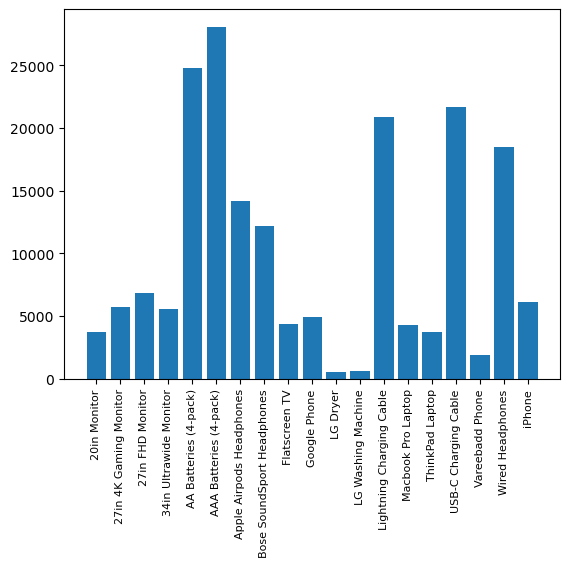

In [460]:
product_group = lldf.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.savefig('product_sale.png')
plt.show()

C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\1275606835.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = lldf.groupby('Product').mean()['Price Each']
C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\1275606835.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Michał\AppData\Local\Temp\ipykernel_18540\1275606835.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


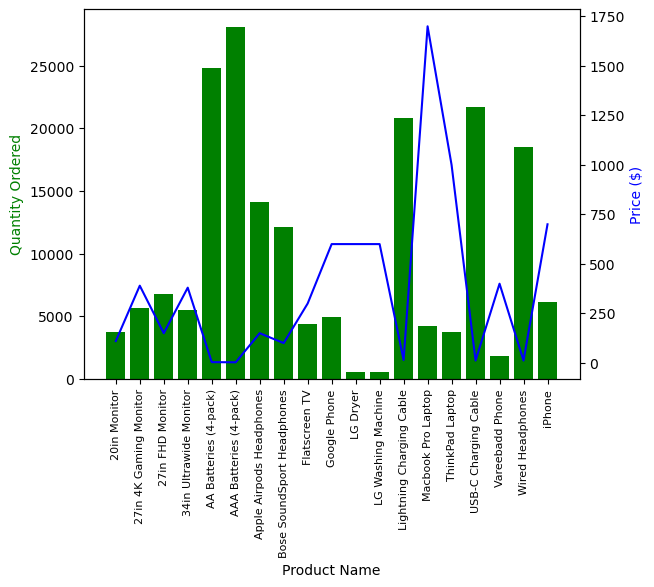

In [459]:


prices = lldf.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.savefig('product_corr.png')

fig.show()